In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model


In [47]:
data = pd.read_csv('./AirQualityUCI/AirQualityUCI.csv')
#drop columns
newdata = data.drop(columns=['Date','Time']);

In [48]:
newdata.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [49]:
#准备运行算法的数据
#样本特征
X = newdata[['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']]
X.head()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3)
0,1360.00,1045.50,1056.25,1692.00,1267.50
1,1292.25,954.75,1173.75,1558.75,972.25
2,1402.00,939.25,1140.00,1554.50,1074.00
3,1375.50,948.25,1092.00,1583.75,1203.25
4,1272.25,835.50,1205.00,1490.00,1110.00


In [50]:
#样本输出
Y = newdata[['CO(GT)','C6H6(GT)','NMHC(GT)','NOx(GT)','NO2(GT)']]
Y.head()

,CO(GT),C6H6(GT),NMHC(GT),NOx(GT),NO2(GT)
0,2.6,11.881723,150,166.0,113.0
1,2.0,9.397165,112,103.0,92.0
2,2.2,8.997817,88,131.0,114.0
3,2.2,9.228796,80,172.0,122.0
4,1.6,6.518224,51,131.0,116.0


In [51]:
#划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

(7017, 5)
(7017, 5)
(2340, 5)
(2340, 5)


In [52]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
intercept = linreg.intercept_
coef = linreg.coef_
print (intercept)
print (coef)

[ -24.16509868 -150.12290646 -254.05341367  239.78951215   86.77405437]
[[ 0.05834538  0.03067947 -0.01132194 -0.06613901  0.00251192]
 [ 0.06241055  0.05166197  0.06275664 -0.00274493 -0.00595357]
 [ 0.28136676 -0.2441018  -0.05136485  0.07627368 -0.04826863]
 [ 0.04527036  0.46361411 -0.16728989 -0.44122034  0.21966681]
 [ 0.07027251  0.17446509 -0.05553964 -0.1711617   0.02548529]]


In [53]:
#模型拟合测试集
Y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(Y_test, Y_pred))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MSE: 15115.416581054358
RMSE: 122.94477045020808


In [56]:
#交叉验证
X = data[['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']]
Y = data[['CO(GT)','C6H6(GT)','NMHC(GT)','NOx(GT)','NO2(GT)']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, Y, cv=10)
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(Y, predicted))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(Y, predicted)))

MSE: 16415.601291783896
RMSE: 128.1233830796857


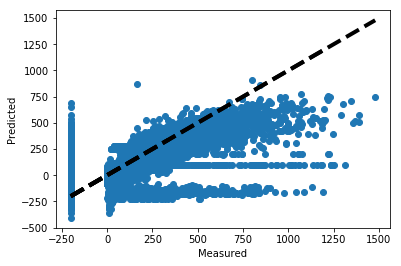

In [57]:
fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()